# 1주차, 5일차 : 이미지/텍스트 분류, 회귀 코드 작성 손에 익을 때까지 암기

- ### Contents 
  1. Basic classification: Classify images of clothing : https://www.tensorflow.org/tutorials/keras/basic_classification
  2. Text classification with TensorFlow Hub: Movie reviews : https://www.tensorflow.org/tutorials/keras/basic_text_classification
  3. Basic regression: Predict fuel efficiency : https://www.tensorflow.org/tutorials/keras/basic_regression
  4. Build a linear model with Estimators : https://www.tensorflow.org/tutorials/estimator/linear



## 1. Basic classification: Classify images of clothing(1/3)

In [1]:
# Tensorflow 2.0이 설치되어 있지 않아서 재설치 해야한다.
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 29kB/s 
     |████████████████████████████████| 3.8MB 40.8MB/s 
     |████████████████████████████████| 450kB 57.8MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.2 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found exist

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


## Dataset : Fashion MNIST
<img src=https://tensorflow.org/images/fashion-mnist-sprite.png />

In [4]:
# 데이터셋 불러오기 사용할 데이터는 Fashion MNIST

fashion_mnist = keras.datasets.fashion_mnist

(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data() 

4423680/4422102 [==============================] - 0s 0us/step


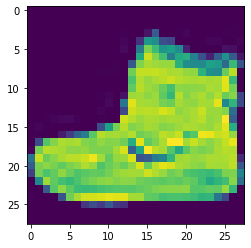

In [6]:
plt.imshow(train_imgs[0])

In [9]:
# 이미지의 각 클래스별 이름 리스트 생성
class_names = ['티셔츠', '바지', '풀오버', '드레스', '코트', '샌들', '치마', '스니커즈', '가방', '앵클부츠']
class_names

['티셔츠', '바지', '풀오버', '드레스', '코트', '샌들', '치마', '스니커즈', '가방', '앵클부츠']

In [10]:
# 데이터 살펴보기
train_imgs.shape

(60000, 28, 28)

In [11]:
len(train_imgs)

60000

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
train_labels.shape

(60000,)

In [14]:
test_imgs.shape

(10000, 28, 28)

In [16]:
len(test_labels)

10000

In [0]:
# 데이터 전처리하기. 값의 범위가 0 ~ 255 인걸 0 ~ 1 사이로 전처리
train_imgs = train_imgs / 255.0
test_imgs  = test_imgs  / 255.0

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52768 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50549 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_te

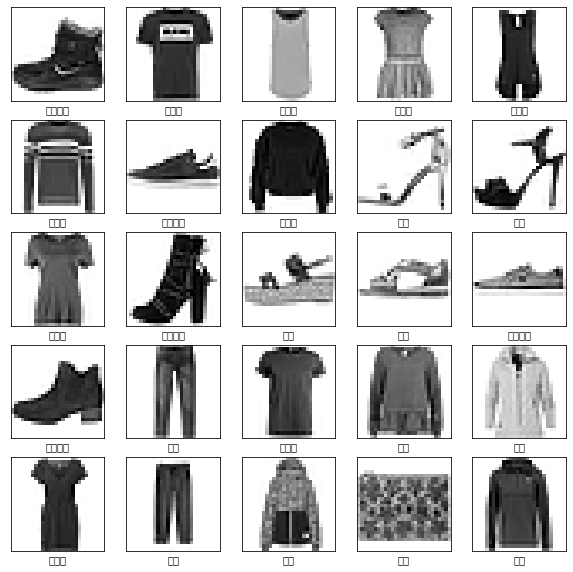

In [20]:
# 그림을 그릴 도화지 설정하기
plt.figure(figsize=(10, 10))

# 25개 이미지 그리기 
for i in range(25):
  # 5*5 서브 플랏 중에 i+1 번째 이미지로 그리기
  plt.subplot(5, 5, i+1)
  # x, y 축 눈금 없애기
  plt.xticks([])
  plt.yticks([])
  # 격자 무늬 제거
  plt.grid(False)
  # 실제로 그림 출력하는 부분
  plt.imshow(train_imgs[i], cmap=plt.cm.binary)
  # 그림에 해당 이미지의 라벨 출력하기
  plt.xlabel(class_names[train_labels[i]])
# 그리기
plt.show()

In [0]:
# 케라스 시퀀셜 객체를 이용한 모델 생성
model = keras.Sequential([
  # 이미지를 1차원 벡터로 펼치고, Fully Connected Layer로 연산
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  # 분류니까 마지막 레이어는 클래스의 개수로 노드를 잡고, 활성화 함수는 softmax로 가져간다.
  keras.layers.Dense(10, activation='softmax')
])

In [0]:
# 모델 컴파일하기, 모델이 학습할 수 있도록 세팅해주는 것
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# 모델 학습하기
model.fit(train_imgs, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.5007 - accuracy: 0.8256
Epoch 2/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3752 - accuracy: 0.8636
Epoch 3/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3369 - accuracy: 0.8767
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3108 - accuracy: 0.8858
Epoch 5/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2930 - accuracy: 0.8924
Epoch 6/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2787 - accuracy: 0.8962
Epoch 7/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2680 - accuracy: 0.9000
Epoch 8/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2558 - accuracy: 0.9040
Epoch 9/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2484 - accuracy: 0.9064
Epoch 10/10
60

In [26]:
# 정확도 평가해보기, 테스트 데이터로 평가하기 model 객체의 evaluate 함수 사용, 손실 값과 정확도를 반환
test_loss, test_acc = model.evaluate(test_imgs, test_labels, verbose=2)

10000/1 - 0s - loss: 0.3242 - accuracy: 0.8792


In [29]:
print('Test accuracy : {:.4}%'.format(test_acc*100))

Test accuracy : 87.92%


In [30]:
# 예측값 만들기, model 객체의 predict 함수 사용, 해당 이미지의 각 클래스에 대한 확률을 반환한다.
predictions = model.predict(test_imgs)
predictions[0]

array([1.9594806e-09, 9.2558772e-10, 7.5505264e-09, 2.4516417e-10,
       9.5922742e-11, 2.9471124e-04, 1.4012191e-07, 2.7671307e-03,
       8.2152425e-08, 9.9693787e-01], dtype=float32)

In [32]:
# 따라서 가장 큰 확률 값을 가지고 있는 클래스 번호를 뽑아야함, Numpy의 argmax 함수를 사용한다.
np.argmax(predictions[0])

9

In [33]:
test_labels[0]

9

In [0]:
# 이제 10개 클래스 예측값의 전체 확률 그래프를 그려보자.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  # 예측한게 실제 값과 같으면 파란색 아니면 빨간색
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)

# 이거는 확률 값들 그리는 함수
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52768 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50549 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_te

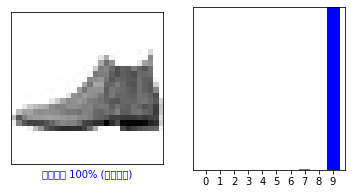

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_imgs)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45768 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52964 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51592 missing from current font.
  font.set_

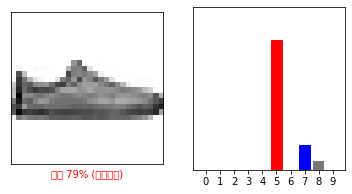

In [39]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_imgs)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52768 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_

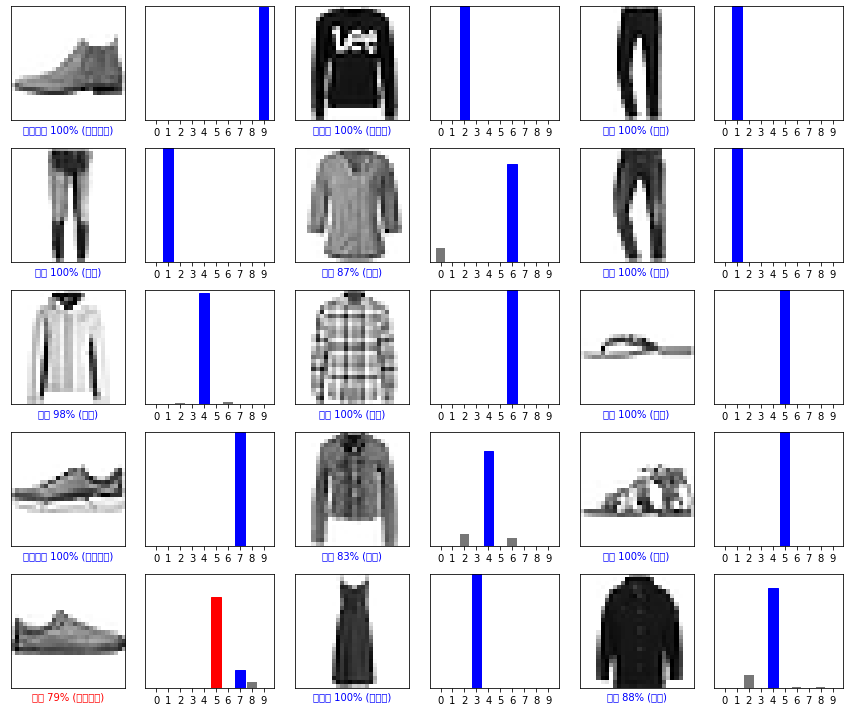

In [41]:
# 한번에 여러개 그려보기
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [42]:
# 이번에는 이미지 1개만 예측해보자
img = test_imgs[1]

print(img.shape)

(28, 28)


In [43]:
# tf.keras에서는 배치 차원이 필요하기 때문에 reshape을 하거나 expand_dims를 통해 차원을 만들어준다

img = (np.expand_dims(img, 0)) # 0번째 차원을 추가하겠다는 의미

print(img.shape)

(1, 28, 28)


In [44]:
# reshape도 동일하게 가능
print(test_imgs[i].reshape((-1,28,28)).shape)

(1, 28, 28)


In [45]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.6743233e-05 1.6360767e-13 9.9985707e-01 8.8207929e-13 7.2138595e-05
  5.8577261e-11 4.3942946e-05 7.2119509e-17 7.7048895e-11 3.7805117e-14]]


([<matplotlib.axis.XTick at 0x7fa38c57e358>,
 <a list of 10 Text xticklabel objects>)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52768 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54400 missing from current font.
  font.set_

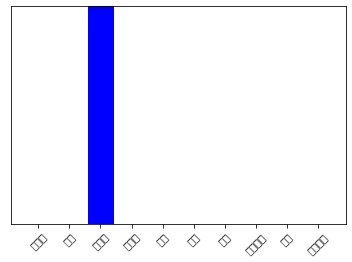

In [46]:
plot_value_array(1, predictions_single[0], test_labels)
plt.xticks(range(10), class_names, rotation=45)

In [48]:
np.argmax(predictions_single[0])

2

## 1. Basic classification: Classify images of clothing(2/3)


In [49]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel Boot']

In [53]:
train_images.shape

(60000, 28, 28)

In [54]:
train_labels.shape

(60000,)

In [55]:
test_images.shape

(10000, 28, 28)

In [56]:
test_labels.shape

(10000,)

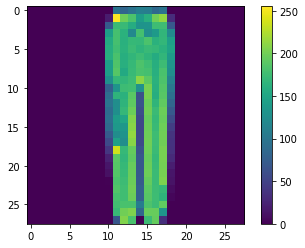

In [57]:
plt.figure()
plt.imshow(train_images[1000])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images  = test_images  / 255.0

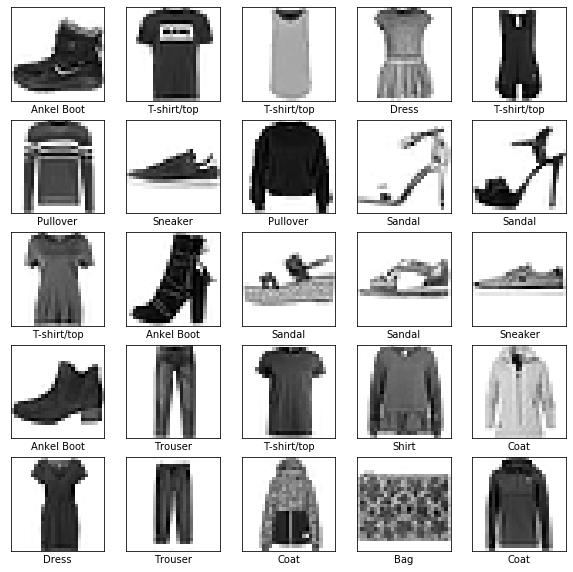

In [60]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
# 이번에는 functional API 으로 해보자
input_tensor = keras.layers.Input(shape=(28, 28))
x = keras.layers.Flatten()(input_tensor)
x = keras.layers.Dense(128, activation='relu')(x)
output_tensor = keras.layers.Dense(10, activation='softmax')(x)

model = keras.models.Model(input_tensor, output_tensor)

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [64]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.4971 - accuracy: 0.8256
Epoch 2/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3768 - accuracy: 0.8644
Epoch 3/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3369 - accuracy: 0.8768
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3127 - accuracy: 0.8859
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2954 - accuracy: 0.8913
Epoch 6/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2801 - accuracy: 0.8962
Epoch 7/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2653 - accuracy: 0.9018
Epoch 8/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2581 - accuracy: 0.9038
Epoch 9/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2465 - accuracy: 0.9076
Epoch 10/10
60

In [65]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.3132 - accuracy: 0.8839

Test accuracy: 0.8839


In [67]:
predictions = model.predict(test_images)
predictions[9]

array([2.6908518e-08, 6.4148398e-10, 5.5558894e-11, 1.7679394e-10,
       2.3319538e-10, 1.3019551e-05, 1.2890050e-09, 9.9998033e-01,
       2.1786205e-07, 6.4444075e-06], dtype=float32)

In [68]:
np.argmax(predictions[0])

9

In [69]:
test_labels[0]

9

In [0]:
# 이미지와 10개 클래스에 대한 확률 그려보기

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else :
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)

def plor_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

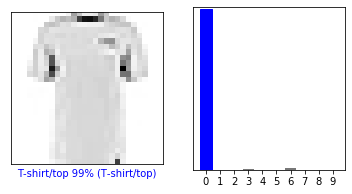

In [75]:
i = 5555
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

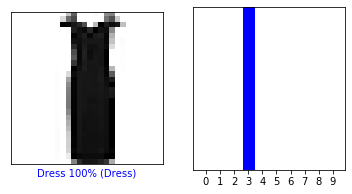

In [76]:
i = 4444
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

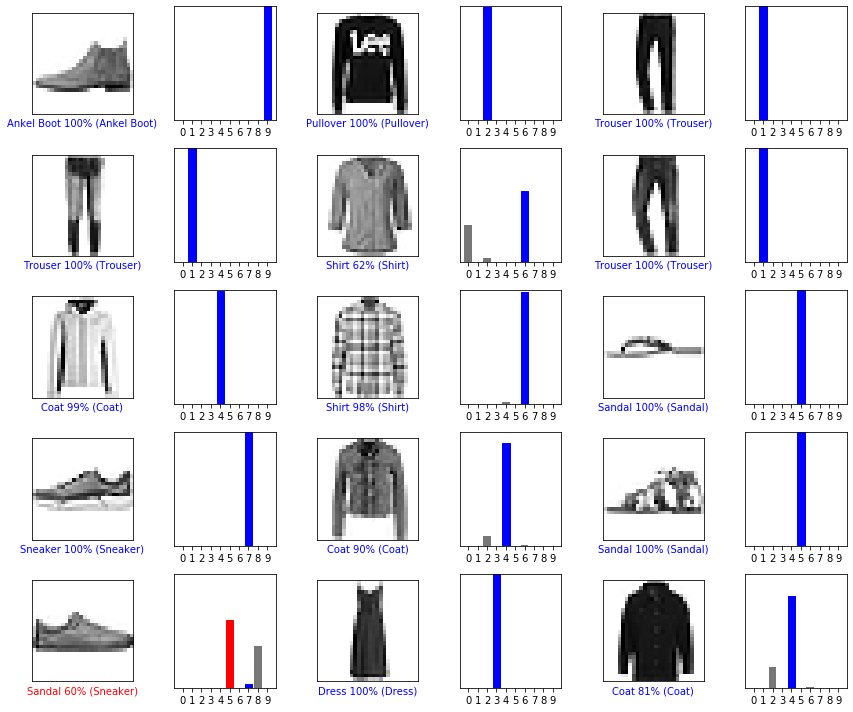

In [79]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [80]:
img = test_images[1999]
print(img.shape)

(28, 28)


In [81]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [82]:
predictions_single = model.predict(img)
print(predictions_single)

[[9.9999630e-01 2.5775752e-13 2.3542700e-06 5.3855548e-10 2.4058687e-07
  4.7531749e-12 1.0604485e-06 7.7895877e-15 3.4685779e-10 8.8858391e-13]]


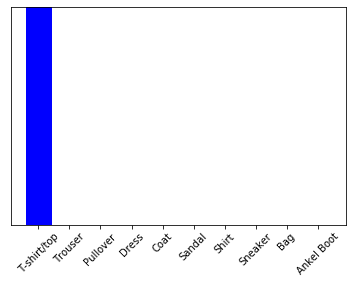

In [88]:
plot_value_array(1999, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [86]:
np.argmax(predictions_single)

0

## 1. Basic classification: Classify images of clothing(3/3)

In [89]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker' ,'Bag', 'Ankle Boot']

In [93]:
train_images.shape

(60000, 28, 28)

In [94]:
train_labels.shape

(60000,)

In [95]:
test_images.shape

(10000, 28, 28)

In [96]:
test_labels.shape

(10000,)

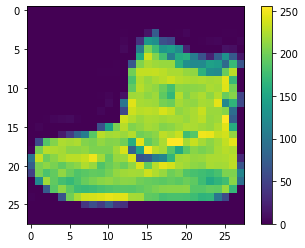

In [98]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

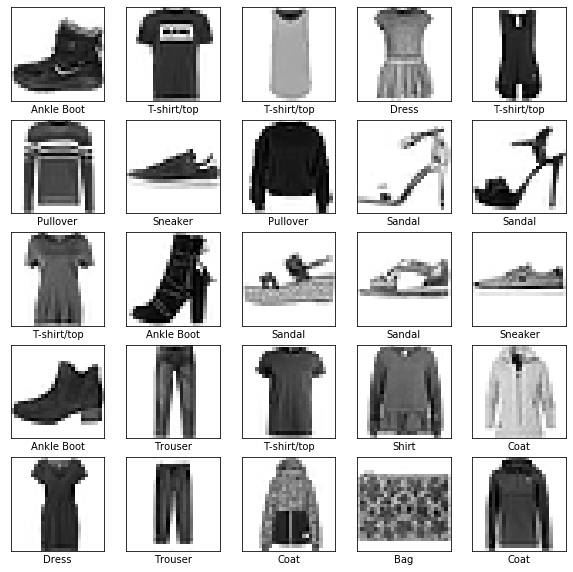

In [100]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [104]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5011 - accuracy: 0.8231
Epoch 2/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3756 - accuracy: 0.8638
Epoch 3/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3373 - accuracy: 0.8780
Epoch 4/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3162 - accuracy: 0.8824
Epoch 5/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2954 - accuracy: 0.8913
Epoch 6/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2812 - accuracy: 0.8958
Epoch 7/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2681 - accuracy: 0.9004
Epoch 8/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2565 - accuracy: 0.9045
Epoch 9/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2478 - accuracy: 0.9071
Epoch 10/10
60

In [105]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('Test accuracy: ', test_acc)

10000/1 - 0s - loss: 0.2851 - accuracy: 0.8792
Test accuracy:  0.8792


In [106]:
predictions = model.predict(test_images)
predictions[0]

array([6.26433518e-08, 5.92467242e-10, 3.11130854e-08, 1.00306236e-10,
       2.05773944e-07, 6.52078018e-02, 1.58720098e-07, 6.25832677e-02,
       3.55380188e-08, 8.72208476e-01], dtype=float32)

In [107]:
np.argmax(predictions[0])

9

In [109]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

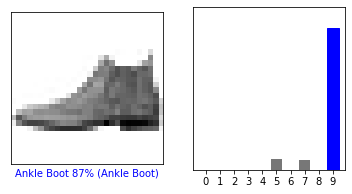

In [116]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

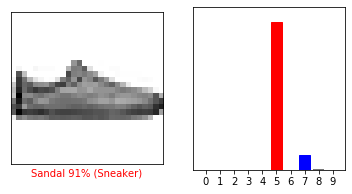

In [117]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

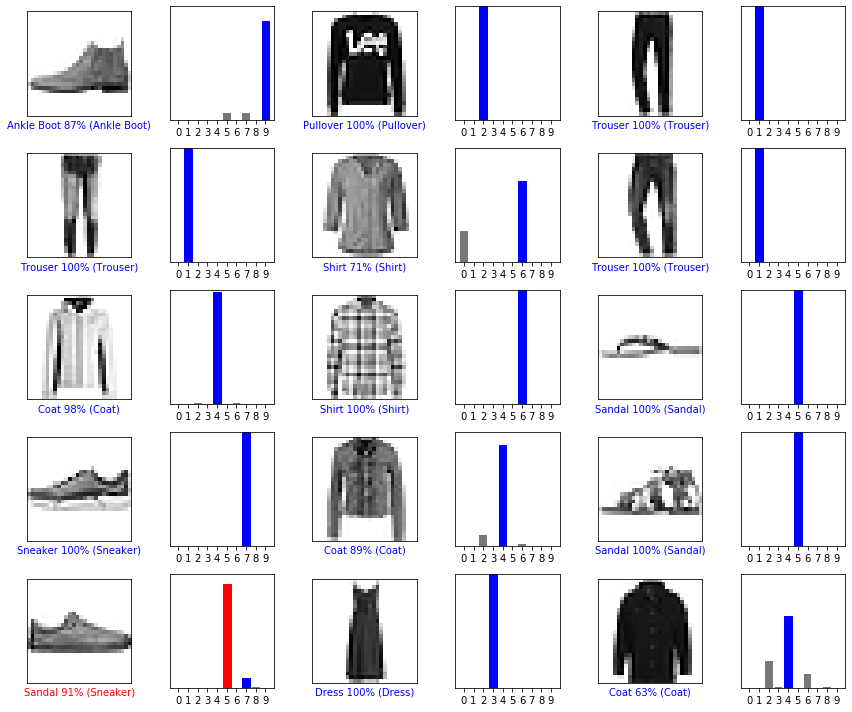

In [120]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [121]:
img = test_images[1]

print(img.shape)

(28, 28)


In [122]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [123]:
predictions_single = model.predict(img)

predictions_single

array([[6.4082592e-06, 4.8225130e-14, 9.9932408e-01, 1.3746049e-10,
        3.4184812e-04, 6.6696795e-09, 3.2771385e-04, 6.4988607e-15,
        1.9836585e-12, 9.0363847e-14]], dtype=float32)

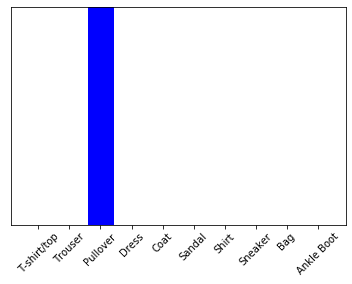

In [124]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [125]:
np.argmax(predictions_single[0])

2

## 2. Text classification with TensorFlow Hub: Movie reviews(1/3)

In [127]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np

import tensorflow as tf

!pip install -q tensorflow-hub
!pip install -q tensorflow-datasets
# TF hub은 텐서플로우에 미리 구현된 모델들을 업로드 해놓는 곳인 듯 하다. Docker Hub 같은..
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print('Version: ', tf.__version__)
print('Eager mode: ', tf.executing_eagerly())
print('Hub Version: ', hub.__version__)
print('GPU is', 'avaliable' if tf.config.experimental.list_physical_devices('GPU') else 'NOT AVALIABLE')

Version:  2.0.0
Eager mode:  True
Hub Version:  0.7.0
GPU is NOT AVALIABLE


In [131]:
# IMDB 데이터셋을 사용한다. 5만개의 영화 리뷰가 들어있는 영화 데이터베이스라고 한다. 학습 2.5만 테스트 2.5만개로 되어있다.
train_validation_split = tfds.Split.TRAIN.subsplit([6, 4])

(train_data, validation_data), test_data = tfds.load(
    name='imdb_reviews',
    split=(train_validation_split, tfds.Split.TEST),
    as_supervised=True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


In [132]:
# 데이터 살펴보기, 이터레이터를 사용해서 10개 데이터만 뽑아본다.
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: id=175607, shape=(10,), dtype=string, numpy=
array([b"As a lifelong fan of Dickens, I have invariably been disappointed by adaptations of his novels.<br /><br />Although his works presented an extremely accurate re-telling of human life at every level in Victorian Britain, throughout them all was a pervasive thread of humour that could be both playful or sarcastic as the narrative dictated. In a way, he was a literary caricaturist and cartoonist. He could be serious and hilarious in the same sentence. He pricked pride, lampooned arrogance, celebrated modesty, and empathised with loneliness and poverty. It may be a clich\xc3\xa9, but he was a people's writer.<br /><br />And it is the comedy that is so often missing from his interpretations. At the time of writing, Oliver Twist is being dramatised in serial form on BBC television. All of the misery and cruelty is their, but non of the humour, irony, and savage lampoonery. The result is just a dark, dismal experience: the stor

In [133]:
train_labels_batch

<tf.Tensor: id=175608, shape=(10,), dtype=int64, numpy=array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0])>

In [137]:
# 모델 만들기
# 어떻게 텍스트를 표현할껀지, 모델에 얼마나 많은 층을 쌓을건지, 각 층에 얼마나 많은 히든 유닛들을 사용할건지 고민해봐야함.
# 텍스트에서는 전처리를 따로 걱정할 필요가 없다. 트랜스퍼 러닝을 사용해서 미리 학습된 임베딩 모델을 사용하려고한다.

# 미리 학습된 임베딩 모델의 TF hub 주소
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
# 이런식으로 케라스 레이어 객체로 만들 수 있다.
hub_layer = hub.KerasLayer(embedding, input_shape=[],
                           dtype=tf.string, trainable=True)
# 해당 레이어를 통과시켜 바로 임베딩 할 수 있다.
hub_layer(train_examples_batch[:3])

<tf.Tensor: id=176134, shape=(3, 20), dtype=float32, numpy=
array([[ 3.9819887 , -4.4838037 ,  5.177359  , -2.3643482 , -3.2938678 ,
        -3.5364532 , -2.4786978 ,  2.5525482 ,  6.688532  , -2.3076782 ,
        -1.9807833 ,  1.1315885 , -3.0339816 , -0.7604128 , -5.743445  ,
         3.4242578 ,  4.790099  , -4.03061   , -5.992149  , -1.7297493 ],
       [ 3.4232912 , -4.230874  ,  4.1488533 , -0.29553518, -6.802391  ,
        -2.5163853 , -4.4002395 ,  1.905792  ,  4.7512794 , -0.40538004,
        -4.3401685 ,  1.0361497 ,  0.9744097 ,  0.71507156, -6.2657013 ,
         0.16533905,  4.560262  , -1.3106939 , -3.1121316 , -2.1338716 ],
       [ 3.8508697 , -5.003031  ,  4.8700504 , -0.04324996, -5.893603  ,
        -5.2983093 , -4.004676  ,  4.1236343 ,  6.267754  ,  0.11632943,
        -3.5934832 ,  0.8023905 ,  0.56146765,  0.9192484 , -7.3066816 ,
         2.8202746 ,  6.2000837 , -3.5709393 , -4.564525  , -2.305622  ]],
      dtype=float32)>

In [0]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
# 이번에는 이진 분류 모델이므로 출력이 1개에 0~1 바운딩 되는 sigmoid를 활성화 함수로 사용한다.
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [140]:
# 모델 summary 함수로 각 층의 파라미터 수 등을 볼 수 있다.
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense_10 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [142]:
# model.fit 함수는 학습하면서 학습, 검증 데이터에 대해 정확도 및 손실 값을 반환해준다
# 이걸 이용해서 그래프를 그릴 수 있음.
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 7s 244ms/step - loss: 0.8358 - accuracy: 0.4871 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
30/30 [==============================] - 7s 225ms/step - loss: 0.6667 - accuracy: 0.6138 - val_loss: 0.6186 - val_accuracy: 0.6611
Epoch 3/20
30/30 [==============================] - 7s 228ms/step - loss: 0.5983 - accuracy: 0.6847 - val_loss: 0.5844 - val_accuracy: 0.7009
Epoch 4/20
30/30 [==============================] - 7s 226ms/step - loss: 0.5665 - accuracy: 0.7187 - val_loss: 0.5585 - val_accuracy: 0.7272
Epoch 5/20
30/30 [==============================] - 7s 231ms/step - loss: 0.5378 - accuracy: 0.7455 - val_loss: 0.5307 - val_accuracy: 0.7495
Epoch 6/20
30/30 [==============================] - 7s 231ms/step - loss: 0.5061 - accuracy: 0.7693 - val_loss: 0.5060 - val_accuracy: 0.7623
Epoch 7/20
30/30 [==============================] - 7s 228ms/step - loss: 0.4763 - accuracy: 0.7899 - val_loss: 0.4790 - val_accuracy: 0.779

In [145]:
# 모델 평가하기
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print('%s: %.3f' % (name, value))

49/49 - 5s - loss: 0.3407 - accuracy: 0.8560
loss: 0.341
accuracy: 0.856


## 2. Text classification with TensorFlow Hub: Movie reviews(2/3)

In [146]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np

import tensorflow as tf

import tensorflow_hub as hub
import tensorflow_datasets as tfds

print('Version: ', tf.__version__)
print('Eager mode: ', tf.executing_eagerly())
print('Hub version: ', hub.__version__)
print('GPU is', 'avaliable' if tf.config.experimental.list_physical_devices('GPU') else 'NOT AVALIABLE')

Version:  2.0.0
Eager mode:  True
Hub version:  0.7.0
GPU is NOT AVALIABLE


In [0]:
train_valiation_split = tfds.Split.TRAIN.subsplit([6,4])

(train_data, validation_data), test_data = tfds.load(
    name='imdb_reviews',
    split=(train_validation_split, tfds.Split.TEST),
    as_supervised=True
)

In [149]:
train_example_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_example_batch

<tf.Tensor: id=181125, shape=(10,), dtype=string, numpy=
array([b"As a lifelong fan of Dickens, I have invariably been disappointed by adaptations of his novels.<br /><br />Although his works presented an extremely accurate re-telling of human life at every level in Victorian Britain, throughout them all was a pervasive thread of humour that could be both playful or sarcastic as the narrative dictated. In a way, he was a literary caricaturist and cartoonist. He could be serious and hilarious in the same sentence. He pricked pride, lampooned arrogance, celebrated modesty, and empathised with loneliness and poverty. It may be a clich\xc3\xa9, but he was a people's writer.<br /><br />And it is the comedy that is so often missing from his interpretations. At the time of writing, Oliver Twist is being dramatised in serial form on BBC television. All of the misery and cruelty is their, but non of the humour, irony, and savage lampoonery. The result is just a dark, dismal experience: the stor

In [150]:
train_labels_batch

<tf.Tensor: id=181126, shape=(10,), dtype=int64, numpy=array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0])>

In [152]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[],
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

<tf.Tensor: id=181306, shape=(3, 20), dtype=float32, numpy=
array([[ 3.9819887 , -4.4838037 ,  5.177359  , -2.3643482 , -3.2938678 ,
        -3.5364532 , -2.4786978 ,  2.5525482 ,  6.688532  , -2.3076782 ,
        -1.9807833 ,  1.1315885 , -3.0339816 , -0.7604128 , -5.743445  ,
         3.4242578 ,  4.790099  , -4.03061   , -5.992149  , -1.7297493 ],
       [ 3.4232912 , -4.230874  ,  4.1488533 , -0.29553518, -6.802391  ,
        -2.5163853 , -4.4002395 ,  1.905792  ,  4.7512794 , -0.40538004,
        -4.3401685 ,  1.0361497 ,  0.9744097 ,  0.71507156, -6.2657013 ,
         0.16533905,  4.560262  , -1.3106939 , -3.1121316 , -2.1338716 ],
       [ 3.8508697 , -5.003031  ,  4.8700504 , -0.04324996, -5.893603  ,
        -5.2983093 , -4.004676  ,  4.1236343 ,  6.267754  ,  0.11632943,
        -3.5934832 ,  0.8023905 ,  0.56146765,  0.9192484 , -7.3066816 ,
         2.8202746 ,  6.2000837 , -3.5709393 , -4.564525  , -2.305622  ]],
      dtype=float32)>

In [164]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense_12 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [166]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 8s 252ms/step - loss: 0.7896 - accuracy: 0.5286 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
30/30 [==============================] - 7s 232ms/step - loss: 0.6565 - accuracy: 0.6338 - val_loss: 0.6109 - val_accuracy: 0.6673
Epoch 3/20
30/30 [==============================] - 7s 233ms/step - loss: 0.5842 - accuracy: 0.7009 - val_loss: 0.5662 - val_accuracy: 0.7219
Epoch 4/20
30/30 [==============================] - 7s 233ms/step - loss: 0.5431 - accuracy: 0.7386 - val_loss: 0.5333 - val_accuracy: 0.7483
Epoch 5/20
30/30 [==============================] - 7s 238ms/step - loss: 0.5127 - accuracy: 0.7641 - val_loss: 0.5046 - val_accuracy: 0.7690
Epoch 6/20
30/30 [==============================] - 7s 236ms/step - loss: 0.4797 - accuracy: 0.7887 - val_loss: 0.4773 - val_accuracy: 0.7857
Epoch 7/20
30/30 [==============================] - 7s 240ms/step - loss: 0.4429 - accuracy: 0.8088 - val_loss: 0.4517 - val_accuracy: 0.802

In [170]:
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print('%s: %.3f' % (name, value))

49/49 - 5s - loss: 0.3154 - accuracy: 0.8674
loss: 0.315
accuracy: 0.867


## 2. Text classification with TensorFlow Hub: Movie reviews(3/3)

In [171]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import tensorflow as tf

import tensorflow_hub as hub
import tensorflow_datasets as tfds

print('Version: ', tf.__version__)
print('Eager mode: ', tf.executing_eagerly())
print('Hub version: ', hub.__version__)
print('GPU is', 'avaliable' if tf.config.experimental.list_physical_devices('GPU') else 'NOT AVALIABLE')

Version:  2.0.0
Eager mode:  True
Hub version:  0.7.0
GPU is NOT AVALIABLE


In [0]:
train_validation_split = tfds.Split.TRAIN.subsplit([6,4])

(train_data, validation_data), test_data = tfds.load(
    name='imdb_reviews',
    split=(train_validation_split, tfds.Split.TEST),
    as_supervised=True
)

In [175]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: id=185936, shape=(10,), dtype=string, numpy=
array([b"As a lifelong fan of Dickens, I have invariably been disappointed by adaptations of his novels.<br /><br />Although his works presented an extremely accurate re-telling of human life at every level in Victorian Britain, throughout them all was a pervasive thread of humour that could be both playful or sarcastic as the narrative dictated. In a way, he was a literary caricaturist and cartoonist. He could be serious and hilarious in the same sentence. He pricked pride, lampooned arrogance, celebrated modesty, and empathised with loneliness and poverty. It may be a clich\xc3\xa9, but he was a people's writer.<br /><br />And it is the comedy that is so often missing from his interpretations. At the time of writing, Oliver Twist is being dramatised in serial form on BBC television. All of the misery and cruelty is their, but non of the humour, irony, and savage lampoonery. The result is just a dark, dismal experience: the stor

In [176]:
train_labels_batch

<tf.Tensor: id=185937, shape=(10,), dtype=int64, numpy=array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0])>

In [177]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[],
                           dtype=tf.string, trainable=True)
hub_layer(train_example_batch[:3])

<tf.Tensor: id=186117, shape=(3, 20), dtype=float32, numpy=
array([[ 3.9819887 , -4.4838037 ,  5.177359  , -2.3643482 , -3.2938678 ,
        -3.5364532 , -2.4786978 ,  2.5525482 ,  6.688532  , -2.3076782 ,
        -1.9807833 ,  1.1315885 , -3.0339816 , -0.7604128 , -5.743445  ,
         3.4242578 ,  4.790099  , -4.03061   , -5.992149  , -1.7297493 ],
       [ 3.4232912 , -4.230874  ,  4.1488533 , -0.29553518, -6.802391  ,
        -2.5163853 , -4.4002395 ,  1.905792  ,  4.7512794 , -0.40538004,
        -4.3401685 ,  1.0361497 ,  0.9744097 ,  0.71507156, -6.2657013 ,
         0.16533905,  4.560262  , -1.3106939 , -3.1121316 , -2.1338716 ],
       [ 3.8508697 , -5.003031  ,  4.8700504 , -0.04324996, -5.893603  ,
        -5.2983093 , -4.004676  ,  4.1236343 ,  6.267754  ,  0.11632943,
        -3.5934832 ,  0.8023905 ,  0.56146765,  0.9192484 , -7.3066816 ,
         2.8202746 ,  6.2000837 , -3.5709393 , -4.564525  , -2.305622  ]],
      dtype=float32)>

In [178]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense_14 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [181]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 8s 259ms/step - loss: 0.8829 - accuracy: 0.5203 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
30/30 [==============================] - 7s 231ms/step - loss: 0.6468 - accuracy: 0.6309 - val_loss: 0.6138 - val_accuracy: 0.6648
Epoch 3/20
30/30 [==============================] - 7s 237ms/step - loss: 0.5966 - accuracy: 0.6883 - val_loss: 0.5829 - val_accuracy: 0.6994
Epoch 4/20
30/30 [==============================] - 7s 238ms/step - loss: 0.5659 - accuracy: 0.7132 - val_loss: 0.5581 - val_accuracy: 0.7207
Epoch 5/20
30/30 [==============================] - 7s 236ms/step - loss: 0.5393 - accuracy: 0.7395 - val_loss: 0.5344 - val_accuracy: 0.7442
Epoch 6/20
30/30 [==============================] - 7s 243ms/step - loss: 0.5101 - accuracy: 0.7645 - val_loss: 0.5106 - val_accuracy: 0.7627
Epoch 7/20
30/30 [==============================] - 7s 238ms/step - loss: 0.4881 - accuracy: 0.7833 - val_loss: 0.4874 - val_accuracy: 0.778

In [184]:
resutls = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print('%s: %.3f' % (name,value))

49/49 - 5s - loss: 0.3256 - accuracy: 0.8594
loss: 0.315
accuracy: 0.867
